**Installing Packages**

Anime And Rating Dataset

First few rows of Anime Dataset
Anime Dataset:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
First few rows of Rating Dataset

Ratings Dataset:
   user_id  anime_id  rating
0        1        2

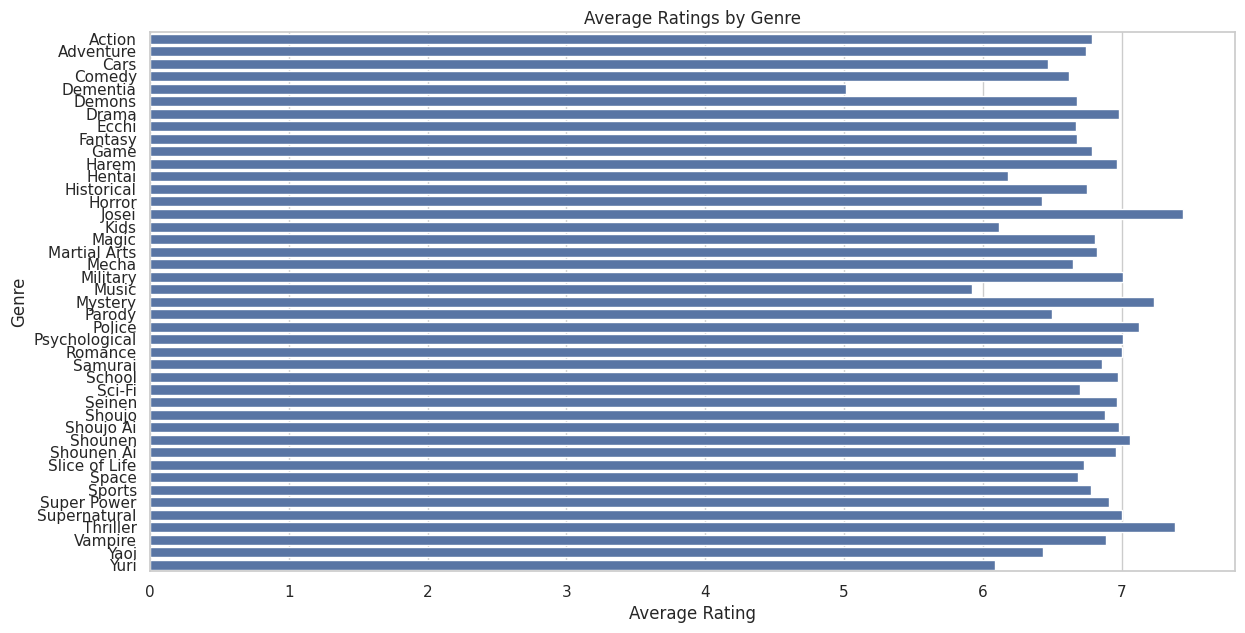

None


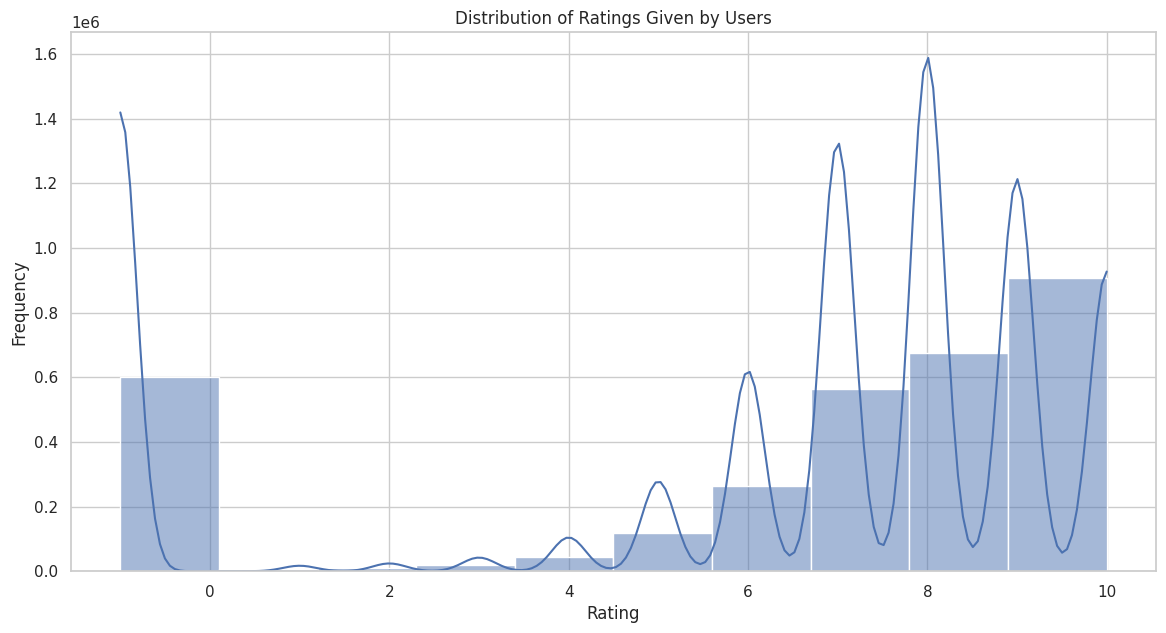

None


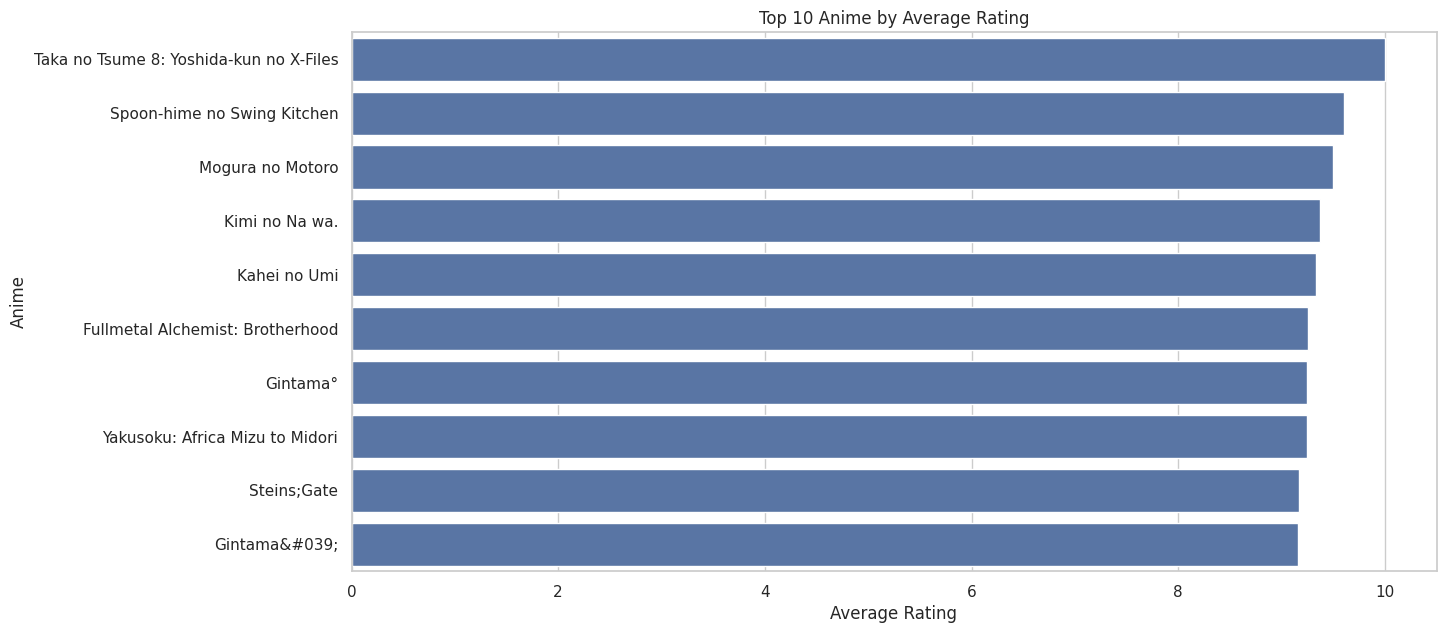

None


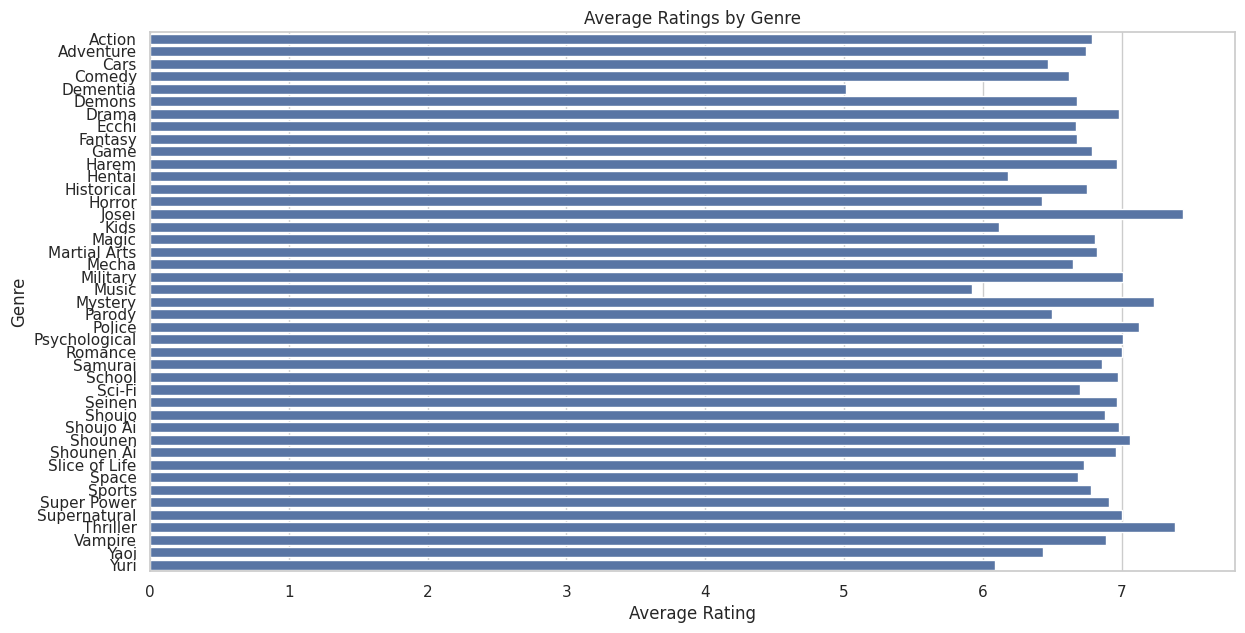

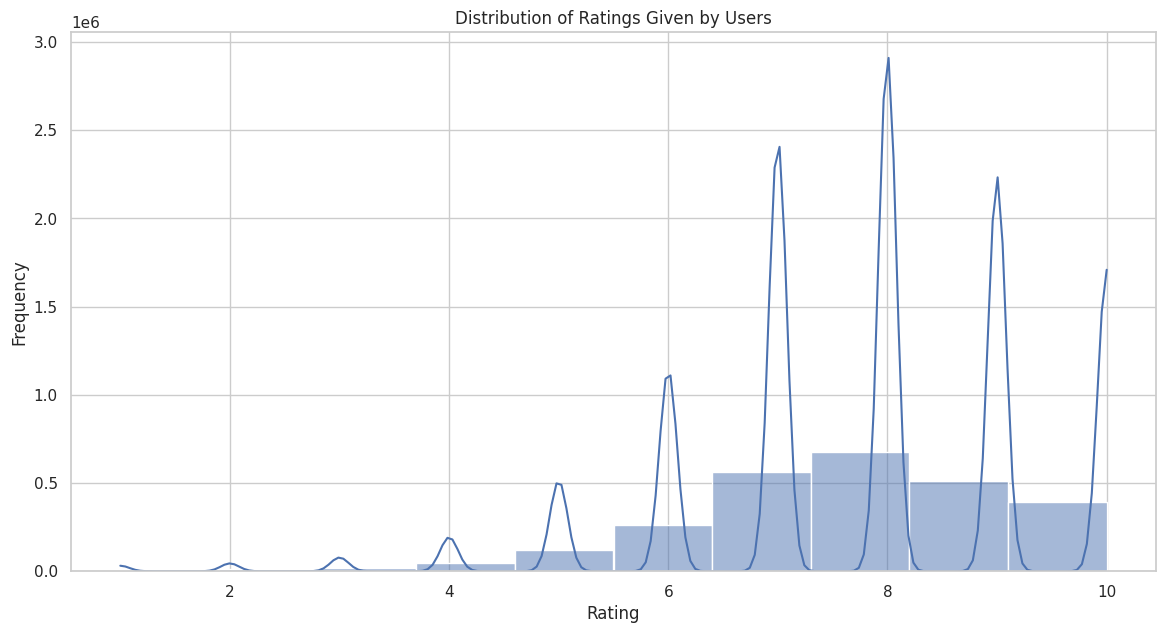

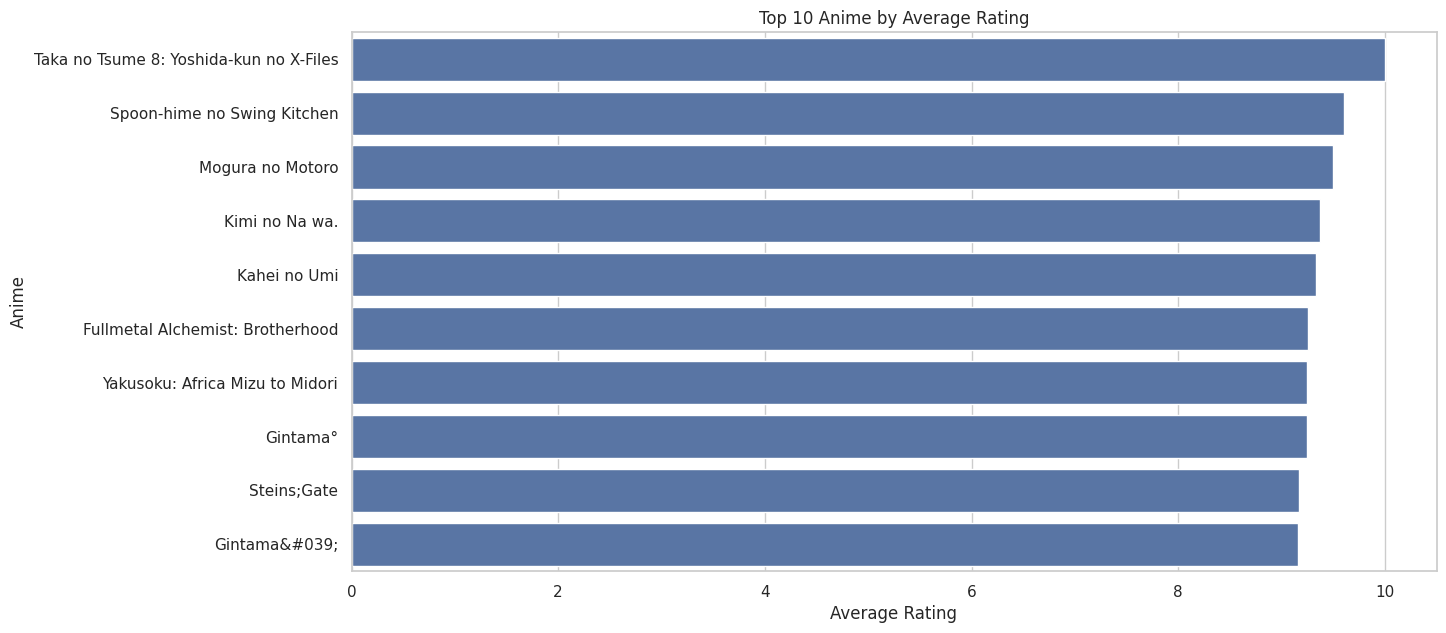

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Step 2: Load and Explore Dataset
anime_df = pd.read_csv('/content/anime.csv')
ratings_df = pd.read_csv('/content/rating.csv')

print("First few rows of Anime Dataset")
print("Anime Dataset:")
print(anime_df.head())

print("First few rows of Rating Dataset")
print("\nRatings Dataset:")
print(ratings_df.head())

print("\nAnime Dataset Info:")
print(anime_df.info())

print("\nRatings Dataset Info:")
print(ratings_df.info())

print("\nMissing Values in Anime Dataset:")
print(anime_df.isnull().sum())

print("\nMissing Values in Ratings Dataset:")
print(ratings_df.isnull().sum())

# Step 3: Formulate a Research Question
# - How do the average ratings of anime vary by genre?
# Split the genre column into multiple rows
anime_genre = anime_df.copy()
anime_genre['genre'] = anime_genre['genre'].str.split(', ')
anime_genre = anime_genre.explode('genre')

# Calculate average ratings by genre
genre_ratings = anime_genre.groupby('genre')['rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='rating', y='genre', data=genre_ratings)
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


# - What is the distribution of ratings given by users?
# Plotting
plt.figure(figsize=(14, 7))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings Given by Users')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# - Which anime have the highest average ratings?
# Calculate average ratings for each anime
top_anime = anime_df[['name', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='rating', y='name', data=top_anime)
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()


# Step 4: Data Cleaning and Preparation
anime_df.dropna(subset=['genre', 'rating'], inplace=True)
ratings_df.dropna(inplace=True)

anime_df['rating'] = anime_df['rating'].astype(float)
ratings_df = ratings_df[ratings_df['rating'] != -1]

# Step 5: Data Analysis and Visualization

# Average Ratings by Genre
anime_genre = anime_df.copy()
anime_genre['genre'] = anime_genre['genre'].str.split(', ')
anime_genre = anime_genre.explode('genre')

genre_ratings = anime_genre.groupby('genre')['rating'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='rating', y='genre', data=genre_ratings)
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Distribution of Ratings Given by Users
plt.figure(figsize=(14, 7))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings Given by Users')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 Anime by Average Rating
top_anime = anime_df[['name', 'rating']].sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='rating', y='name', data=top_anime)
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()
